# Marketing-Spend-Optimisation-LTV-Analysis-for-an-Event-Ticketing-Platform

Este proyecto analiza el comprotamiento de usuarios, ventas y marketing de Showz durante el periodo 2017 al 2018 para optimizar la inversión publicitaria. El objetivo es analizar la convcersión de usuarios y cuanto valor generan y el retorno de inversión  por fuente de adquisición y dispositivos.

Es importante que se descarguen los archivos a travez de las siguientes rutas de archivos:

- /datasets/visits_log_us.csv Acceda el dataset
- /datasets/orders_log_us.csv Acceda el dataset
- /datasets/costs_us.csv Acceda el dataset

#### Paso 1. Carga y preparación de Datos


In [1]:
# Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Rutas de archivos:
path_visits = 'datasets/visits_log_us.csv'
path_orders = 'datasets/orders_log_us.csv'
path_costs = 'datasets/costs_us.csv'

In [3]:
# Carga de Data Sets:
visits = pd.read_csv(path_visits)
orders = pd.read_csv(path_orders)
costs = pd.read_csv(path_costs)

Limpieza de datos

In [4]:
# Utilidad: primer día del mes
def to_month(dt: pd.Timestamp) -> pd.Timestamp:
    return pd.Timestamp(year=dt.year, month=dt.month, day=1)

# Limpieza de nombres
visits.columns = [c.strip().lower().replace(' ', '_') for c in visits.columns]
orders.columns = [c.strip().lower().replace(' ', '_') for c in orders.columns]
costs.columns  = [c.strip().lower().replace(' ', '_') for c in costs.columns]

# Tipos de datos
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts']   = pd.to_datetime(visits['end_ts'])
orders['buy_ts']   = pd.to_datetime(orders['buy_ts'])
costs['dt']        = pd.to_datetime(costs['dt'])

# Columnas derivadas 
visits['session_date']  = visits['start_ts'].dt.normalize()   # fecha (sin hora)
visits['session_month'] = visits['session_date'].apply(to_month)
visits['session_week']  = visits['start_ts'].dt.isocalendar().week.astype(int)
visits['session_length_minutes'] = (
    visits['end_ts'] - visits['start_ts']
).dt.total_seconds() / 60.0

orders['buy_date']  = orders['buy_ts'].dt.normalize()
orders['buy_month'] = orders['buy_date'].apply(to_month)

# Normalización de identificadores
visits.rename(columns={'uid': 'user_id'}, inplace=True)
orders.rename(columns={'uid': 'user_id'}, inplace=True)

# Chequeos básicos
print("Rangos temporales (min → max):")
print("- visits:", visits['session_date'].min(), "→", visits['session_date'].max())
print("- orders:", orders['buy_date'].min(),   "→", orders['buy_date'].max())
print("- costs :", costs['dt'].min(),          "→", costs['dt'].max())

print("\nTasa de nulos por columna (visits):")
print(visits.isna().mean().to_frame('null_rate_visits'))

print("\nTasa de nulos por columna (orders):")
print(orders.isna().mean().to_frame('null_rate_orders'))

print("\nTasa de nulos por columna (costs):")
print(costs.isna().mean().to_frame('null_rate_costs'))

# Vistas rápidas
display(visits.head())
display(orders.head())
display(costs.head())


Rangos temporales (min → max):
,- visits: 2017-06-01 00:00:00 → 2018-05-31 00:00:00
,- orders: 2017-06-01 00:00:00 → 2018-06-01 00:00:00
,- costs : 2017-06-01 00:00:00 → 2018-05-31 00:00:00
,
,Tasa de nulos por columna (visits):
,                        null_rate_visits
,device                               0.0
,end_ts                               0.0
,source_id                            0.0
,start_ts                             0.0
,user_id                              0.0
,session_date                         0.0
,session_month                        0.0
,session_week                         0.0
,session_length_minutes               0.0
,
,Tasa de nulos por columna (orders):
,           null_rate_orders
,buy_ts                  0.0
,revenue                 0.0
,user_id                 0.0
,buy_date                0.0
,buy_month               0.0
,
,Tasa de nulos por columna (costs):
,           null_rate_costs
,source_id              0.0
,dt                     0.0
,costs          

,device,end_ts,source_id,start_ts,user_id,session_date,session_month,session_week,session_length_minutes
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,51,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,8,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,26,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-01,20,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-01,52,0.0


,buy_ts,revenue,user_id,buy_date,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Para este proyecto elegi usar display(), en lugar de print(),ya que display() tiene una vista mas clara y mayor legibilidad.

#### Paso 2. Informes y Métricas

In [5]:
# 2.1 Visitas:

# 2.1.1 ¿Cuántas personas lo usan cada día, semana y mes?

dau = visits.groupby('session_date')['user_id'].nunique()

wau = (visits
       .set_index('session_date')
       .groupby(pd.Grouper(freq='W'))['user_id']
       .nunique())

mau = (visits
       .set_index('session_date')
       .groupby(pd.Grouper(freq='MS'))['user_id']

       .nunique())

print("DAU promedio:", int(dau.mean()))

print("WAU promedio:", int(wau.mean()))
print("MAU promedio:", int(mau.mean()))



DAU promedio: 907
,WAU promedio: 5716
,MAU promedio: 23228


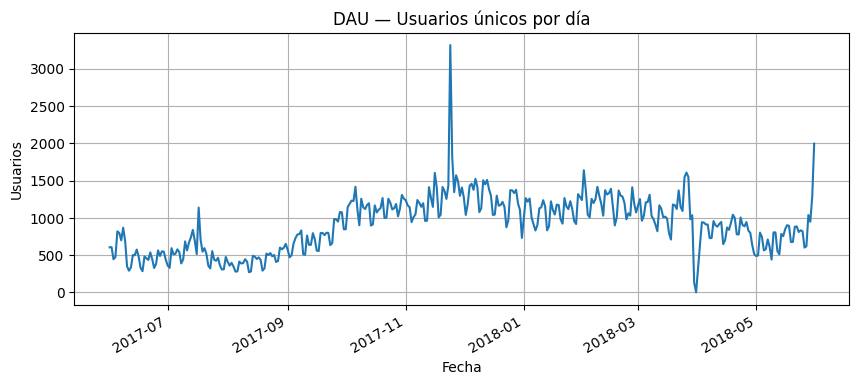

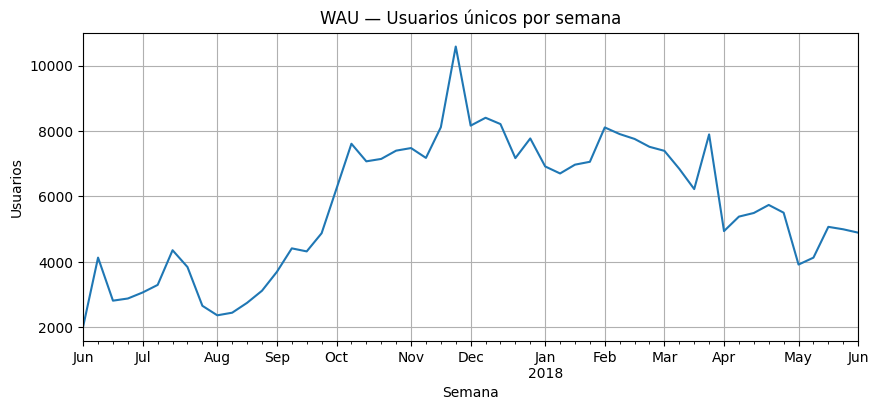

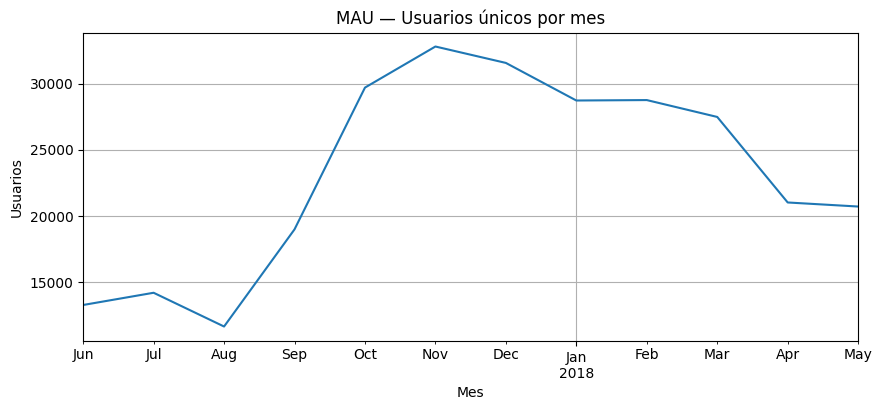

In [6]:
# Gráficas:
def plot_series(series, title, xlabel='', ylabel=''):
    plt.figure(figsize=(10,4))
    series.plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

plot_series(dau, "DAU — Usuarios únicos por día", "Fecha", "Usuarios")
plot_series(wau, "WAU — Usuarios únicos por semana", "Semana", "Usuarios")
plot_series(mau, "MAU — Usuarios únicos por mes", "Mes", "Usuarios")


Sesiones/día (primeros 5 días):
,session_date
,2017-06-01    664
,2017-06-02    658
,2017-06-03    477
,2017-06-04    510
,2017-06-05    893
,dtype: int64


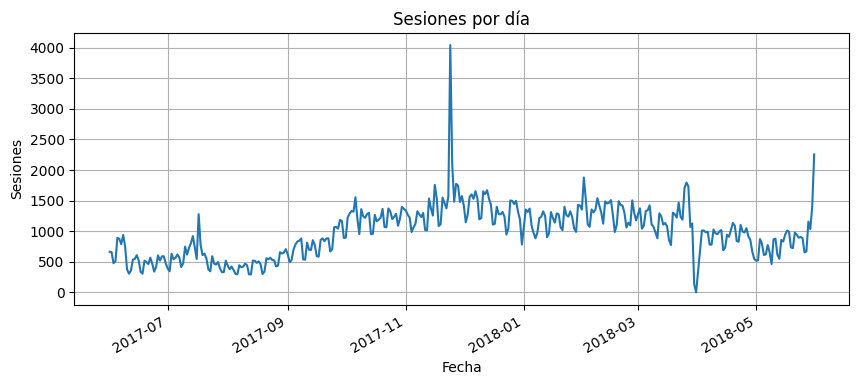

In [7]:
# 2.1.2 ¿Cuántas sesiones hay por día?
sessions_per_day = visits.groupby('session_date').size()
print("Sesiones/día (primeros 5 días):")
print(sessions_per_day.head())

plot_series(sessions_per_day, "Sesiones por día", "Fecha", "Sesiones")

Duración de sesión (min) — stats globales:


count    359400.00
mean         10.72
std          16.62
min         -46.00
50%           5.00
90%          27.00
95%          38.00
max         711.00
Name: session_length_minutes, dtype: float64

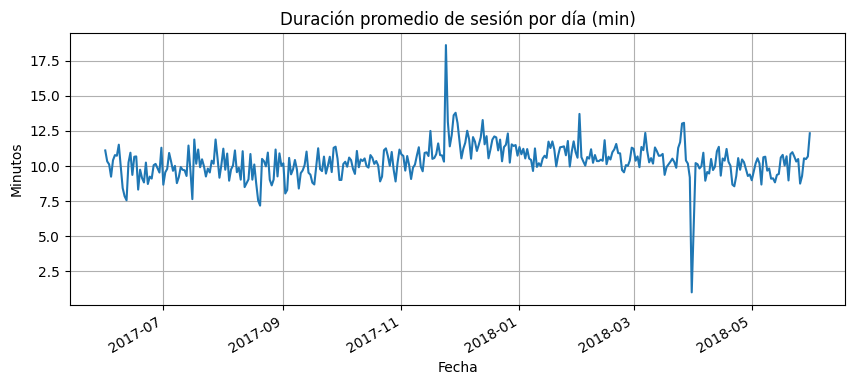

In [8]:
# 2.1.3 ¿Cuál es la duración de cada sesión?

# Estadísticos de duración por sesión (global)
dur_stats = visits['session_length_minutes'].describe(percentiles=[0.5, 0.9, 0.95]).round(2)
print("Duración de sesión (min) — stats globales:")
display(dur_stats)

# Promedio diario de duración de sesión
session_len_daily = visits.groupby('session_date')['session_length_minutes'].mean()
plot_series(session_len_daily, "Duración promedio de sesión por día (min)", "Fecha", "Minutos")


In [9]:
# 2.1.4 ¿Con qué frecuencia los usuarios regresan?

# Calculamos días desde la primera sesión
vis_unique = visits[['user_id','session_date']].drop_duplicates()
first_seen = vis_unique.groupby('user_id')['session_date'].min().rename('first_date')
vis_unique = vis_unique.merge(first_seen, left_on='user_id', right_index=True, how='left')
vis_unique['days_since_first'] = (vis_unique['session_date'] - vis_unique['first_date']).dt.days

# Por usuario, nos quedamos con el mayor 'days_since_first' (lo más lejos que volvió)
max_delta = vis_unique.groupby('user_id')['days_since_first'].max()

ret_1d  = (max_delta >= 1).mean()
ret_7d  = (max_delta >= 7).mean()
ret_30d = (max_delta >= 30).mean()

print(f"Retención ≥1d:  {ret_1d:.2%}")
print(f"Retención ≥7d:  {ret_7d:.2%}")
print(f"Retención ≥30d: {ret_30d:.2%}")


Retención ≥1d:  19.74%
,Retención ≥7d:  15.89%
,Retención ≥30d: 11.98%


In [10]:
# Resumen de Visitas
summary_usage = pd.DataFrame({
    'DAU_promedio':[int(dau.mean())],
    'WAU_promedio':[int(wau.mean())],
    'MAU_promedio':[int(mau.mean())],
    'sesiones/día_promedio':[int(sessions_per_day.mean())],
    'duración_mediana_min':[visits['session_length_minutes'].median()],
    'ret_≥1d':[ret_1d],
    'ret_≥7d':[ret_7d],
    'ret_≥30d':[ret_30d],
})
summary_usage


,DAU_promedio,WAU_promedio,MAU_promedio,sesiones/día_promedio,duración_mediana_min,ret_≥1d,ret_≥7d,ret_≥30d
0,907,5716,23228,987,5.0,0.197419,0.158865,0.119788


In [11]:
# 2.2 Ventas:

# 2.2.1 Tiempo a conversión (desde primera sesión a primera compra)
# Primera fecha de sesión por usuario
first_seen = visits.groupby('user_id')['session_date'].min().rename('first_date')

# Primera compra por usuario
first_buy = orders.groupby('user_id')['buy_date'].min().rename('first_buy_date')

# Unimos sesiones y compras
user_first = first_seen.to_frame().merge(first_buy, left_index=True, right_index=True, how='left')
user_first['days_to_first_buy'] = (user_first['first_buy_date'] - user_first['first_date']).dt.days

# Clasificamos en buckets de conversión
def conv_bucket(d):
    if pd.isna(d): return 'no_buy'
    if d == 0: return '0d'
    if d == 1: return '1d'
    if 2 <= d <= 7: return '2-7d'
    if 8 <= d <= 30: return '8-30d'
    return '>30d'

user_first['conv_bucket'] = user_first['days_to_first_buy'].apply(conv_bucket)

# Distribución
conv_dist = (user_first['conv_bucket']
             .value_counts(normalize=True)
             .reindex(['0d','1d','2-7d','8-30d','>30d','no_buy'])
             .rename('share'))

print("Distribución de tiempo a conversión (%):")
print((conv_dist * 100).round(2).astype(str) + '%')


Distribución de tiempo a conversión (%):
,0d        10.97%
,1d         0.86%
,2-7d       1.02%
,8-30d      0.99%
,>30d       2.16%
,no_buy    83.99%
,Name: share, dtype: object


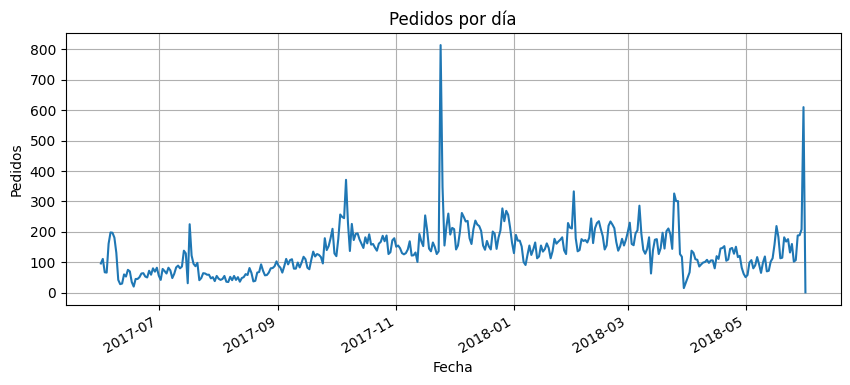

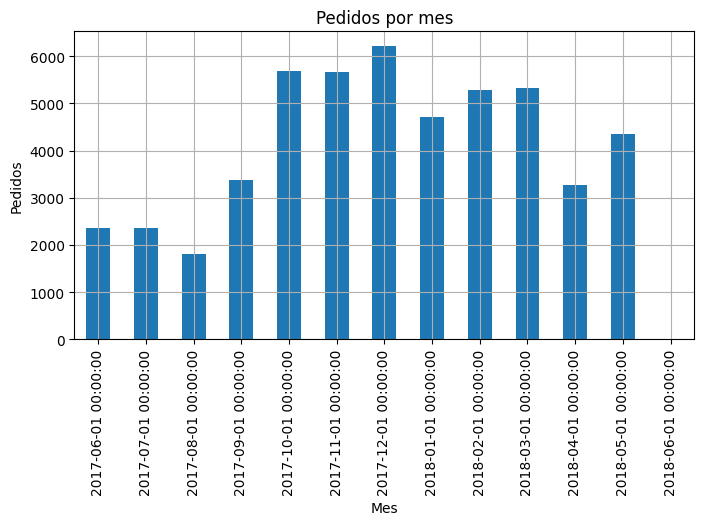

In [12]:
# 2.2.2 ¿Cuántos pedidos hacen durante un período de tiempo dado?

# Pedidos diarios y mensuales
orders_daily   = orders.groupby('buy_date').size()
orders_monthly = orders.groupby('buy_month').size()

plt.figure(figsize=(10,4))
orders_daily.plot()
plt.title('Pedidos por día')
plt.xlabel('Fecha'); plt.ylabel('Pedidos'); plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
orders_monthly.plot(kind='bar')
plt.title('Pedidos por mes')
plt.xlabel('Mes'); plt.ylabel('Pedidos'); plt.grid(True)
plt.show()


El análisis de pedidos diarios revela un comportamiento altamente volátil: en algunos días se registran menos de 50 compras y en otros se alcanzan picos superiores a 800. Estos repuntes no son anomalías técnicas, sino que responden directamente al lanzamiento de eventos de gran interés, como conciertos o festivales, cuya demanda se concentra en uno o dos días. Esto confirma que los ingresos diarios dependen casi por completo de la agenda de eventos, lo que obliga a focalizar los esfuerzos de marketing en maximizar la conversión rápida durante esos momentos clave.

En la visión mensual, el volumen de pedidos oscila entre 1,800 y 6,200. Se observa un crecimiento sostenido hasta diciembre de 2017, el pico más alto del periodo, seguido de un enero también fuerte y una caída en marzo–abril de 2018, meses con menor oferta de espectáculos. En mayo, las ventas se recuperan con el lanzamiento de nuevos eventos. Esto evidencia una clara estacionalidad: el último trimestre del año es el más sólido en ventas, mientras que la primavera tiende a ser más débil.

En conclusión, Showz no presenta un flujo de ventas uniforme, sino marcado por el calendario natural de la industria del entretenimiento. La estrategia de negocio y de marketing debe enfocarse en anticipar los picos, reforzar la infraestructura técnica para absorber la demanda concentrada y reasignar inversiones hacia los periodos y canales con mayor retorno esperado.

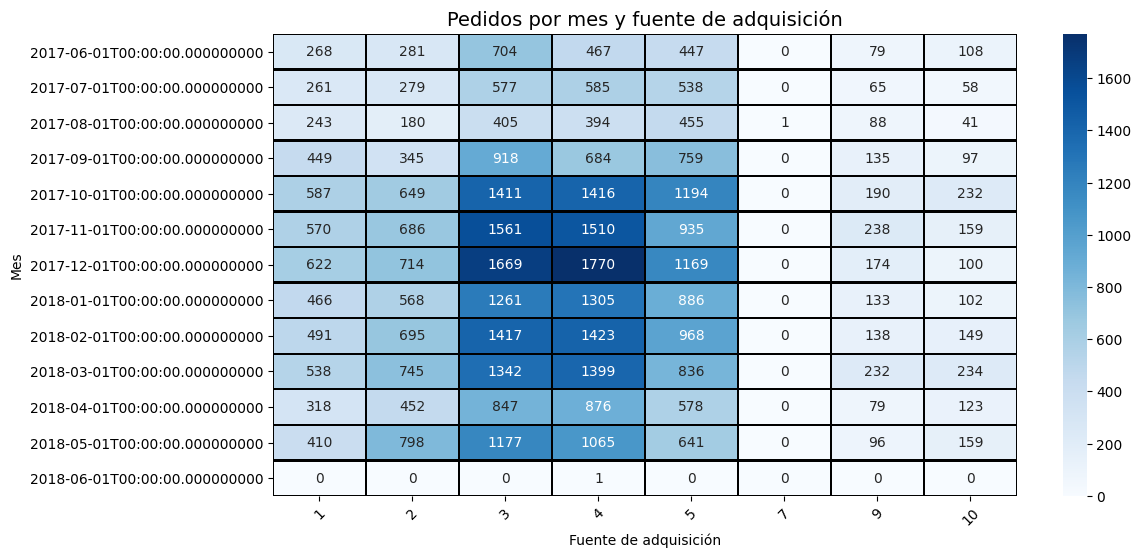

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

if 'uid' in orders.columns: orders.rename(columns={'uid':'user_id'}, inplace=True)
if 'uid' in visits.columns: visits.rename(columns={'uid':'user_id'}, inplace=True)

orders['buy_date']  = orders['buy_ts'].dt.normalize()
orders['buy_month'] = pd.to_datetime(orders['buy_date']).values.astype('datetime64[M]')

# Fuente de adquisición (first-touch)
first_visit_src = (visits.sort_values('start_ts')
                   .groupby('user_id').first()[['source_id']])
first_visit_src.rename(columns={'source_id':'acq_source'}, inplace=True)



# Aseguramos que orders_with_src existe 
orders_with_src = orders.merge(
    first_visit_src[['acq_source']], 
    left_on='user_id', right_index=True, how='left'
)

# Pivot table: nº de pedidos por mes y fuente
pivot_orders_src = pd.pivot_table(
    orders_with_src,
    index='buy_month',
    columns='acq_source',
    values='revenue',
    aggfunc='count',
    fill_value=0
)

# Gráfico heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    pivot_orders_src,
    annot=True, fmt='d', linewidths=1, linecolor='black', cmap="Blues"
)
plt.title("Pedidos por mes y fuente de adquisición", fontsize=14)
plt.xlabel("Fuente de adquisición")
plt.ylabel("Mes")
plt.xticks(rotation=45)
plt.show()


El gráfico de pedidos por mes y fuente de adquisición muestra que la mayor parte de las ventas proviene de unas pocas fuentes dominantes, en particular las identificadas como 3, 4 y 2, que concentran más de mil pedidos mensuales en los periodos de mayor actividad, alcanzando picos de hasta 1,770 en diciembre de 2017. 
La estacionalidad es clara: el último trimestre del año registra los volúmenes más altos, mientras que marzo y abril de 2018 presentan una caída significativa, seguida de un repunte en mayo. Por otro lado, las fuentes secundarias, como 0, 6, 7, 9 y 10, apenas aportan unos cientos de pedidos y tienen un peso limitado en el total. Esto refleja una fuerte dependencia de la plataforma hacia unos pocos canales de adquisición, lo que representa tanto una fortaleza —al identificar los medios más efectivos— como un riesgo, en caso de que dichas fuentes pierdan efectividad o aumenten sus costos. 
Por lo tanto, la estrategia de marketing debe enfocarse en potenciar los canales más rentables, optimizar o replantear el papel de las fuentes de bajo volumen, y diversificar la captación de usuarios para reducir la vulnerabilidad y asegurar un crecimiento sostenible alineado con el calendario natural de los eventos.

AOV global: 5.0
,
,AOV mensual (primeros meses):
,buy_month
,2017-06-01    4.060106
,2017-07-01    5.306589
,2017-08-01    4.847139
,2017-09-01    5.416448
,2017-10-01    4.928280
,Name: revenue, dtype: float64


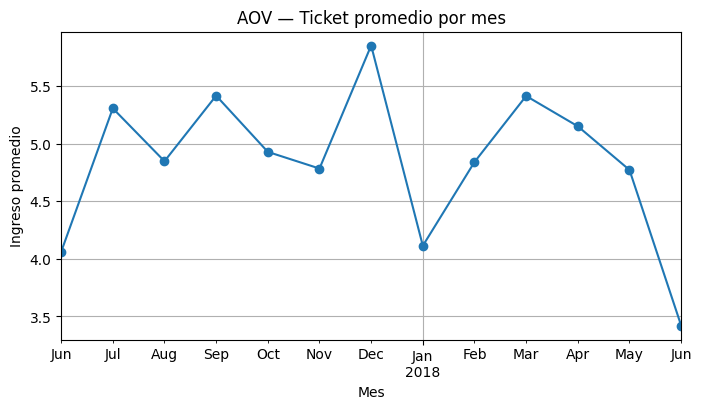

In [14]:
# 2.2.3 ¿Cuál es el tamaño promedio de compra? (AOV (Average Order Value))

# Ticket promedio por mes
aov_monthly = orders.groupby('buy_month')['revenue'].mean()

print("AOV global:", round(orders['revenue'].mean(),2))
print("\nAOV mensual (primeros meses):")
print(aov_monthly.head())

plt.figure(figsize=(8,4))
aov_monthly.plot(marker='o')
plt.title('AOV — Ticket promedio por mes')
plt.xlabel('Mes'); plt.ylabel('Ingreso promedio'); plt.grid(True)
plt.show()



El ticket promedio mensual muestra variaciones claras según la oferta de eventos. En diciembre y marzo alcanza sus picos más altos, reflejando espectáculos de mayor precio y alta demanda, mientras que en enero y junio cae a sus niveles más bajos, vinculados a temporadas con eventos más accesibles. Esto confirma que el AOV depende directamente del calendario y atractivo de los eventos, por lo que las campañas de marketing deben aprovechar los meses de mayor valor y enfocarse en volumen durante los periodos con tickets más bajos.

Muestra de LTV acumulado (primeras cohortes):


age_months,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-06-01,9557.49,12222.07,13686.76,17568.85,21509.44,24333.92,27823.87,30094.68,32412.59,35894.23,38098.24,40026.05
2017-07-01,9874.89,10934.17,12043.07,13026.03,13873.02,14671.10,15259.10,16029.40,16753.92,17344.95,17812.11,17812.11
2017-08-01,6234.81,7232.13,8233.48,9179.69,9989.73,10522.63,11009.28,12255.51,13086.15,13461.87,13461.87,13461.87
2017-09-01,12357.20,16057.68,18168.31,28607.24,29895.72,31805.77,32772.61,33263.99,33682.56,33682.56,33682.56,33682.56
2017-10-01,18362.32,22172.15,23499.17,24557.22,25600.69,26622.88,27201.79,27857.69,27857.69,27857.69,27857.69,27857.69


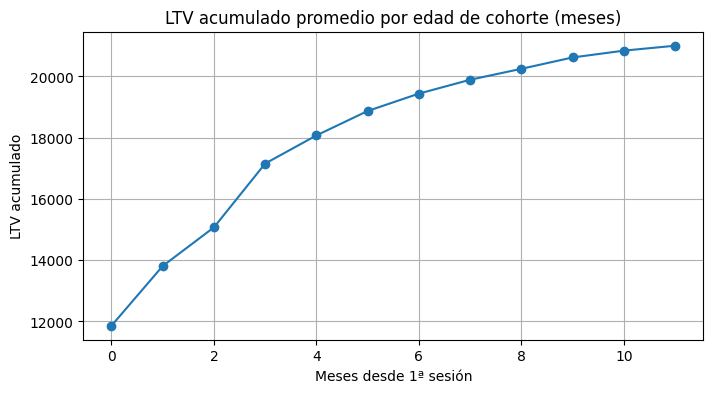

In [15]:
# 2.2.4 ¿Cuánto dinero traen? (LTV (Lifetime Value))

# Cohorte = primer mes de sesión
cohort = first_seen.apply(to_month).rename('cohort_month')

# Unimos cohortes a las órdenes
orders_cf = orders.merge(cohort, left_on='user_id', right_index=True, how='left')

# Edad de cohorte en meses = diferencia entre compra y cohorte
orders_cf['age_months'] = ((orders_cf['buy_month'].dt.year  - orders_cf['cohort_month'].dt.year) * 12 +
                           (orders_cf['buy_month'].dt.month - orders_cf['cohort_month'].dt.month))

# Matriz de LTV (ingresos por cohorte x edad)
ltv = orders_cf.groupby(['cohort_month','age_months'])['revenue'].sum().unstack(fill_value=0)

# LTV acumulado
ltv_cum = ltv.cumsum(axis=1)

print("Muestra de LTV acumulado (primeras cohortes):")
display(ltv_cum.head())

# LTV promedio acumulado por edad (promedio entre cohortes disponibles)
ltv_cum_mean = ltv_cum.replace(0, np.nan).mean(axis=0)

plt.figure(figsize=(8,4))
ltv_cum_mean.plot(marker='o')
plt.title('LTV acumulado promedio por edad de cohorte (meses)')
plt.xlabel('Meses desde 1ª sesión'); plt.ylabel('LTV acumulado'); plt.grid(True)
plt.show()


El gráfico de LTV acumulado promedio por edad de cohorte muestra un crecimiento sostenido del valor de vida del cliente durante los primeros meses tras su adquisición, con una fuerte aceleración entre el mes 0 y el mes 3. A partir del cuarto mes, la curva mantiene una tendencia positiva pero más moderada, alcanzando un nivel de estabilización hacia el mes 10, donde los incrementos adicionales son mínimos. Esto indica que la mayor parte del valor de los clientes se captura en los primeros seis meses, lo que hace crítico optimizar campañas de conversión temprana y retención inicial, mientras que a largo plazo el crecimiento marginal del LTV es reducido.

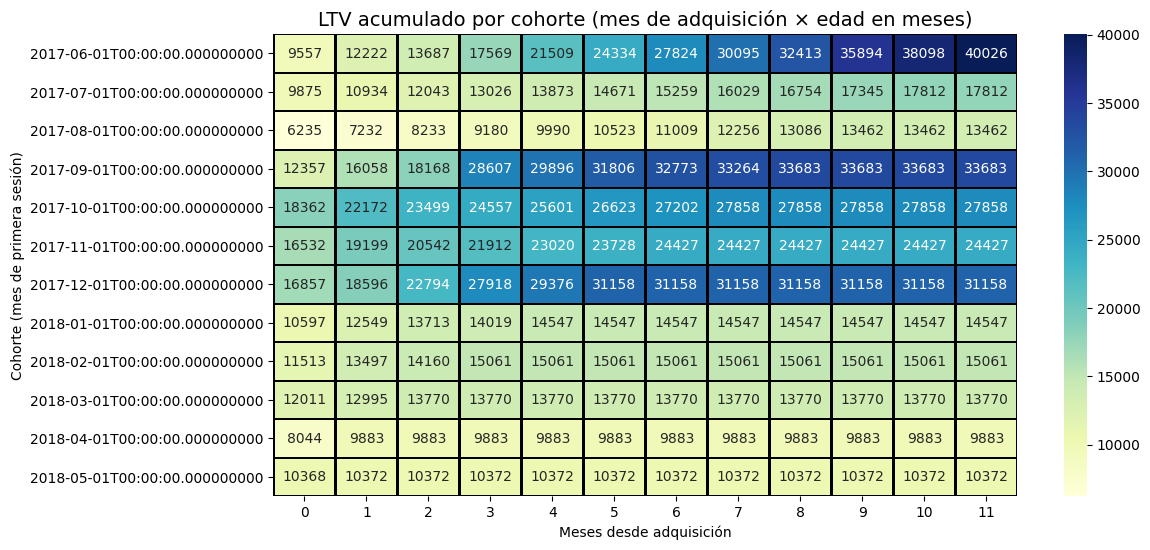

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cohorte = primer mes de sesión
cohort = first_seen.apply(to_month).rename('cohort_month')

# Unimos cohortes con órdenes
orders_cf = orders.merge(cohort, left_on='user_id', right_index=True, how='left')

# Edad de cohorte en meses = meses desde la adquisición
orders_cf['age_months'] = (
    (orders_cf['buy_month'].dt.year  - orders_cf['cohort_month'].dt.year) * 12 +
    (orders_cf['buy_month'].dt.month - orders_cf['cohort_month'].dt.month)
)

# LTV por cohorte (ingresos acumulados por cohorte × edad)
ltv = orders_cf.groupby(['cohort_month','age_months'])['revenue'].sum().unstack(fill_value=0)
ltv_cum = ltv.cumsum(axis=1)   # acumulado en el tiempo

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    ltv_cum,
    annot=True, fmt='.0f', linewidths=1, linecolor='black', cmap="YlGnBu"
)
plt.title("LTV acumulado por cohorte (mes de adquisición × edad en meses)", fontsize=14)
plt.xlabel("Meses desde adquisición")
plt.ylabel("Cohorte (mes de primera sesión)")
plt.show()


El gráfico de LTV acumulado por cohorte muestra que los clientes adquiridos entre octubre y diciembre de 2017 alcanzaron los valores de vida más altos, superando los 30,000 en menos de 6 meses, lo que evidencia la fuerza de los eventos de fin de año. En contraste, las cohortes más recientes de 2018 muestran un LTV considerablemente más bajo y una curva que se estabiliza pronto, lo que refleja menor recompra o eventos de menor atractivo. Finalmente, la tendencia general confirma que la mayor parte del valor se captura en los primeros meses posteriores a la adquisición, lo que resalta la importancia de optimizar el marketing y la retención durante ese periodo crítico.

In [17]:
# Resumen de Ventas:

kpis_sales = pd.DataFrame({
    'pedidos_totales': [len(orders)],
    'AOV_global': [orders['revenue'].mean()],
    'usuarios_con_compra': [user_first['first_buy_date'].notna().sum()],
    'mediana_días_a_1ª_compra': [user_first['days_to_first_buy'].median()],
}).T
kpis_sales.columns = ['valor']
print(kpis_sales)


                                 valor
,pedidos_totales           50415.000000
,AOV_global                    4.999647
,usuarios_con_compra       36523.000000
,mediana_días_a_1ª_compra      0.000000


Gasto total en marketing: 329131.62
,
,Gasto por fuente (top):
,source_id
,3    141321.63
,4     61073.60
,5     51757.10
,2     42806.04
,1     20833.27
,Name: costs, dtype: float64


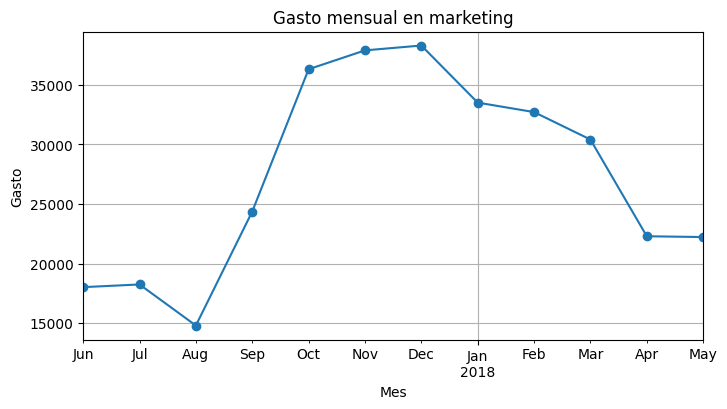

In [18]:
# Marketing:

# 2.3.1 ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

# Gasto total
spend_total = costs['costs'].sum()
print("Gasto total en marketing:", round(spend_total,2))

# Gasto por fuente
spend_by_source = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print("\nGasto por fuente (top):")
print(spend_by_source.head())

# Evolución temporal (por mes)
costs['month'] = costs['dt'].apply(to_month)
spend_monthly = costs.groupby('month')['costs'].sum()

plt.figure(figsize=(8,4))
spend_monthly.plot(marker='o')
plt.title('Gasto mensual en marketing')
plt.xlabel('Mes'); plt.ylabel('Gasto'); plt.grid(True)
plt.show()


El gráfico de Gasto mensual en marketing muestra tres hallazgos clave. Primero, existe un incremento acelerado a partir de septiembre, alcanzando su punto máximo entre noviembre y diciembre de 2017 con más de 38,000, lo que coincide con la temporada alta de eventos y ventas. Segundo, tras enero de 2018 se observa una disminución progresiva en la inversión, aunque todavía se mantiene en niveles elevados durante el primer trimestre. Finalmente, a partir de abril el gasto cae de forma más marcada, estabilizándose en niveles cercanos a 22,000, lo que refleja una estrategia de ajuste tras los picos de demanda estacional.

In [19]:
# 2.3.2 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

# Fuente de adquisición = source_id de la primera sesión del usuario
first_visit_src = (visits.sort_values('start_ts')
                   .groupby('user_id').first()[['source_id','device','session_month']])
first_visit_src.rename(columns={'source_id':'acq_source',
                                'device':'acq_device',
                                'session_month':'acq_month'}, inplace=True)

# Usuarios que llegaron a comprar
customers = user_first.dropna(subset=['first_buy_date']).index
acquired_buyers = first_visit_src.loc[first_visit_src.index.isin(customers)]

# Número de compradores por fuente
buyers_by_source = acquired_buyers['acq_source'].value_counts()

# CAC = gasto total de fuente / nº compradores
cac_by_source = (spend_by_source / buyers_by_source).replace([np.inf, np.nan], np.nan)

cac_table = pd.DataFrame({
    'buyers': buyers_by_source,
    'spend': spend_by_source,
    'CAC': cac_by_source
}).sort_values('CAC')

print("CAC por fuente (muestra):")
print(cac_table.head())


CAC por fuente (muestra):
,    buyers     spend       CAC
,10    1329   5822.49  4.381106
,9     1088   5517.49  5.071222
,4    10296  61073.60  5.931779
,1     2899  20833.27  7.186364
,5     6931  51757.10  7.467479


ROMI por fuente (top):


1    0.492351
2    0.096191
9    0.043844
5    0.016750
4   -0.071664
dtype: float64

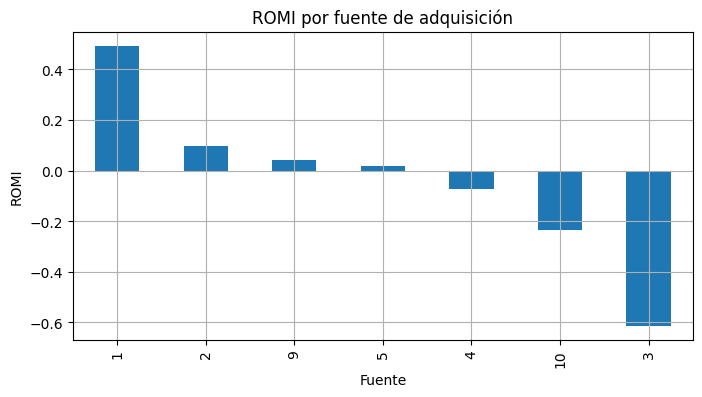

In [20]:
# 2.3.3 ¿Cuán rentables eran las inversiones? (ROMI)

# Atribuimos todos los ingresos de un usuario a su fuente de adquisición (first-touch)
orders_with_src = orders.merge(first_visit_src[['acq_source']], left_on='user_id', right_index=True, how='left')

# Ingresos por fuente
rev_by_source = orders_with_src.groupby('acq_source')['revenue'].sum()

# ROMI = (Ingresos - Gasto) / Gasto
romi_by_source = ((rev_by_source - spend_by_source) / spend_by_source).dropna().sort_values(ascending=False)

print("ROMI por fuente (top):")
display(romi_by_source.head())

# Gráfico ROMI por fuente
plt.figure(figsize=(8,4))
romi_by_source.plot(kind='bar')
plt.title('ROMI por fuente de adquisición')
plt.xlabel('Fuente'); plt.ylabel('ROMI'); plt.grid(True)
plt.show()


El gráfico de ROMI por fuente de adquisición evidencia tres puntos clave. Primero, la fuente 1 es la más rentable, con un ROMI cercano al 0.5, lo que indica que genera un retorno positivo significativo frente al gasto en marketing. Segundo, algunas fuentes como la 2, 9 y 5 logran un retorno ligeramente positivo, aunque su margen es reducido y requieren optimización para maximizar su potencial. Finalmente, fuentes como la 3 y la 10 presentan un ROMI claramente negativo, llegando en el caso de la 3 a -0.6, lo que refleja pérdidas y sugiere la necesidad de reconsiderar o recortar inversión en ellas para evitar que sigan drenando recursos.

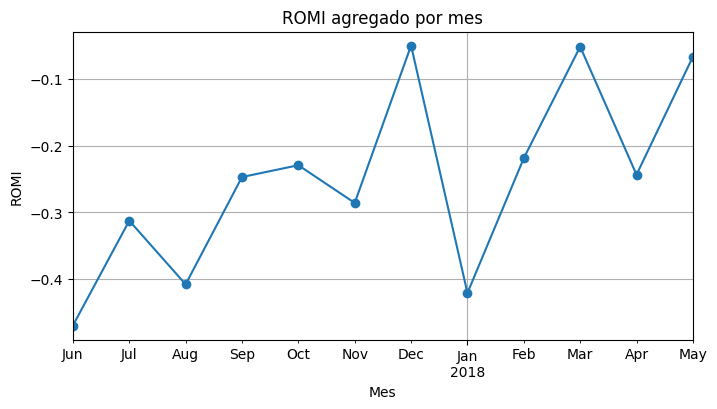

In [21]:
# Revenue por mes (first-touch)
orders_with_src['buy_month'] = orders_with_src['buy_date'].apply(to_month)
rev_by_month = orders_with_src.groupby('buy_month')['revenue'].sum()

# Gasto por mes ya lo tenemos en spend_monthly
romi_monthly = ((rev_by_month - spend_monthly) / spend_monthly).dropna()

plt.figure(figsize=(8,4))
romi_monthly.plot(marker='o')
plt.title('ROMI agregado por mes')
plt.xlabel('Mes'); plt.ylabel('ROMI'); plt.grid(True)
plt.show()


El gráfico de ROMI agregado por mes evidencia tres hallazgos clave. Primero, aunque la rentabilidad del marketing mejora gradualmente desde junio de 2017, la mayoría de los meses se mantienen en valores negativos, lo que indica que el retorno no alcanza a cubrir la inversión. Segundo, diciembre y marzo destacan como los periodos de mejor desempeño, con ROMI cercano a cero, asociados probablemente a la venta de eventos de alto atractivo. Finalmente, enero muestra la mayor caída del periodo, reflejando una baja eficiencia en la inversión justo después de la temporada alta, lo que resalta la importancia de ajustar la estrategia en meses de baja demanda para evitar pérdidas significativas.

#### Paso 3. Conclusión 

Tabla Resumen


,ventas,visitas,ROMI
2017-06-01,9557.49,13259.0,-0.469470
2017-07-01,12539.47,14183.0,-0.312551
2017-08-01,8758.78,11631.0,-0.407812
2017-09-01,18345.51,18975.0,-0.247176
2017-10-01,27987.70,29692.0,-0.229475


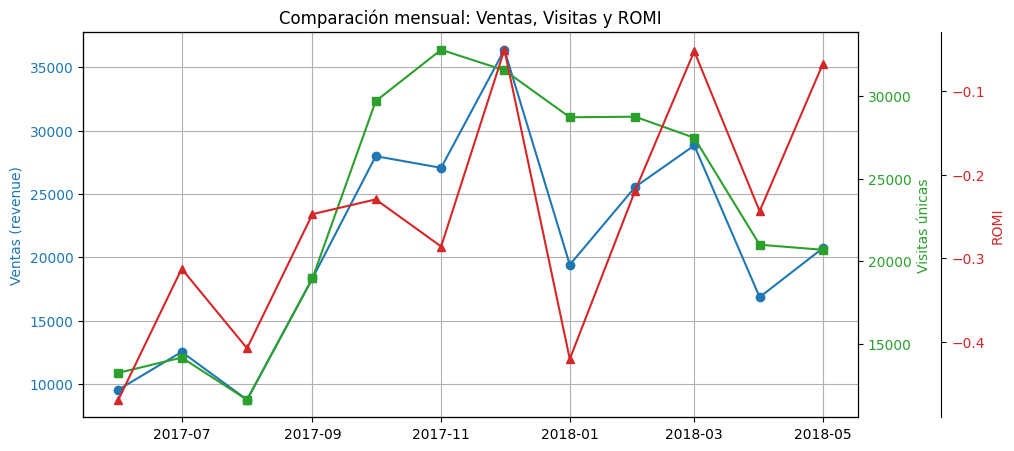

In [22]:
# Series temporales comparables:

# Ventas por mes (ingresos)
sales_monthly = orders.groupby('buy_month')['revenue'].sum()

# Visitas por mes (usuarios únicos)
visits_monthly = visits.groupby('session_month')['user_id'].nunique()

# ROMI por mes (ya calculado en Paso 2.3)
romi_monthly = ((sales_monthly - spend_monthly) / spend_monthly).dropna()

# Merge en un solo DataFrame 
df_compare = pd.DataFrame({
    'ventas': sales_monthly,
    'visitas': visits_monthly,
    'ROMI': romi_monthly
}).dropna()

print("Tabla Resumen")
display(df_compare.head())

# --- 3) Graficamos ---
fig, ax1 = plt.subplots(figsize=(10,5))

# Eje primario (ventas y visitas)
ax1.plot(df_compare.index, df_compare['ventas'], color='tab:blue', marker='o', label='Ventas (revenue)')
ax1.set_ylabel('Ventas (revenue)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax1_2 = ax1.twinx()  # segundo eje y para visitas
ax1_2.plot(df_compare.index, df_compare['visitas'], color='tab:green', marker='s', label='Visitas (usuarios)')
ax1_2.set_ylabel('Visitas únicas', color='tab:green')
ax1_2.tick_params(axis='y', labelcolor='tab:green')

# Eje secundario (ROMI en %)
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # desplazar eje
ax2.plot(df_compare.index, df_compare['ROMI'], color='tab:red', marker='^', label='ROMI')
ax2.set_ylabel('ROMI', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título y cuadrícula
plt.title('Comparación mensual: Ventas, Visitas y ROMI')
ax1.grid(True)
plt.show()


El gráfico de Comparación mensual: Ventas, Visitas y ROMI revela tres hallazgos clave. Primero, las ventas y las visitas siguen una tendencia similar, con picos en noviembre y diciembre de 2017, lo que confirma que la estacionalidad de los eventos impulsa tanto el tráfico como los ingresos. Segundo, el ROMI muestra gran volatilidad: incluso en meses de alto volumen de ventas y visitas, la rentabilidad no siempre acompaña, lo que sugiere que los costos de marketing en esos periodos pueden reducir la eficiencia. Finalmente, enero de 2018 evidencia una fuerte caída simultánea en ventas y ROMI, lo que destaca la necesidad de ajustar la estrategia en meses posteriores a la temporada alta para mantener un equilibrio entre inversión, tráfico y retorno.

#### Optimización de Marketing en Showz

Showz opera en un mercado sujeto a la oferta de eventos y el interés del público.  
También es importante mencionar que las campañas publicitarias no siempre van de la mano con la fecha en la que los tickets salen a la venta.  La promoción suele desarrollarse en varias etapas y a través de distintos canales.  

Lo que sí resulta determinante es el tipo de evento: un concierto de Adele genera mucha mayor expectativa e interés que en contraste, por ejemplo, entradas para La Bohème.  

En la industria de eventos la Retención natural baja de cada evento es distinto; los clientes vuelven solo si hay otro evento que les interesa. La Conversión rápida se da al ver un evento atractivo, la compra se realiza casi de inmediato. El Marketing es crítico no solo para generar tráfico, sino para vincular la oferta correcta al público correcto en el momento justo.   
 
El valor del cliente se maximiza si Showz logra que un usuario compre tickets a múltiples eventos durante el año.  

El análisis de 2017–2018 revela que, aunque la plataforma atrae un volumen estable de usuarios (~23k MAU):  
- La retención es baja (12% a 30 días).  
- La conversión ocurre rápido (0–1 días) porque los tickets son compras impulsadas por la oportunidad del evento.  
- La recompra es limitada.  

Las fuentes de adquisición muestran resultados dispares: algunas generan ROMI positivo y deben potenciarse, mientras que otras generan pérdidas.  
El LTV recupera el CAC en 6–12 meses, lo cual es consistente con la naturaleza puntual de los eventos.

    Hallazgos Clave

A. Comportamiento de usuarios
- Usuarios activos: ~900 diarios, ~5.7k semanales y ~23k mensuales.  
- Retención: baja a 30 días, normal en este sector porque el interés depende de eventos específicos.  
- Duración de sesión: corta; los usuarios buscan y compran rápido.  

B. Conversión y ventas
- Compras inmediatas: la mayoría compra en 0–1 días tras registrarse.  
- Pedidos mensuales: muestran estacionalidad fuerte (suben en meses con eventos de alto interés).  
- AOV estable: el ticket promedio no fluctúa mucho, señal de precios definidos por la naturaleza de los eventos.  
- LTV: recupera CAC en 6–12 meses; los clientes fieles sí generan valor a lo largo del tiempo.  

C. Marketing y rentabilidad
- Gasto en marketing elevado, concentrado en pocas fuentes.  
- CAC variable: depende mucho del canal y del tipo de evento promocionado.  
- ROMI positivo en algunas fuentes (rentables).  
- ROMI negativo en otras (pérdida de inversión).  

Conclusión 
Showz cuenta con una base sólida de usuarios y conversiones rápidas, pero enfrenta el reto estructural de la industria: la baja retención natural.  

Se recomienda:
- Invertir más en canales rentables (ROMI positivo).  
- Reducir gasto en fuentes deficitarias.  
- Fortalecer el engagement con usuarios para que compren en más de un evento al año.  

Con estas acciones, Showz no solo optimizará su gasto en marketing, sino que también incrementará el LTV de sus clientes y consolidará su posición como plataforma líder en venta de tickets de eventos.
